# 1.  DATASET SELECTION

# ABOUT THE DATASET

Here's a brief description of each column in the dataset:

- **sl_no:** Serial number of the student (identifies each record uniquely).
- **gender:** Gender of the student (0 for male and 1 for female).
* **ssc_p:** Secondary Education percentage (10th Grade).
* **ssc_b:** Board of education for Secondary Education (Central or Others).
* **hsc_p:** Higher Secondary Education percentage (12th Grade).
* **hsc_b:** Board of education for Higher Secondary (Central or Others).
* **hsc_s:** Specialization in Higher Secondary (Commerce, Science, Arts).
* **degree_p:** Percentage obtained in Undergraduate Degree.
- **degree_t:** Type of Undergraduate Degree (Sci&Tech, Comm&Mgmt, Others).
* **workex:** Whether the student has prior work experience (Yes or No).
* **etest_p:** Employability test percentage score.
* **specialisation:** Specialization in MBA (Mkt&HR, Mkt&Fin).
* **mba_p:** Percentage obtained in MBA.
* **status:** Placement status (Placed or Not Placed).
* **salary:** Salary offered to the student (if placed).

This dataset contain various academic and personal factors that could influence the likelihood of a student getting placed, which can be used to build models to predict the placement status. The salary field is populated only for those students who have been placed

In [307]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")



In [309]:


# Load your dataset (you can replace this with the actual dataset path)
df = pd.read_csv(r'C:\Users\taman\OD\Desktop\DOCUMENTS\NN ASSIGNMENT-2\train.csv')  # Replace 'student_placement.csv' with your actual dataset



In [311]:
print(df.head())


   sl_no  gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0      1       0  67.00   Others  91.00   Others  Commerce     58.00   
1      2       0  79.33  Central  78.33   Others   Science     77.48   
2      3       0  65.00  Central  68.00  Central      Arts     64.00   
3      4       0  56.00  Central  52.00  Central   Science     52.00   
4      5       0  85.80  Central  73.60  Central  Commerce     73.30   

    degree_t workex  etest_p specialisation  mba_p      status    salary  
0   Sci&Tech     No     55.0         Mkt&HR  58.80      Placed  270000.0  
1   Sci&Tech    Yes     86.5        Mkt&Fin  66.28      Placed  200000.0  
2  Comm&Mgmt     No     75.0        Mkt&Fin  57.80      Placed  250000.0  
3   Sci&Tech     No     66.0         Mkt&HR  59.43  Not Placed       NaN  
4  Comm&Mgmt     No     96.8        Mkt&Fin  55.50      Placed  425000.0  


In [313]:
# Display the first few rows of the dataset
df.head()



,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [315]:
# Check basic info about the dataset
print("\nDataset Info:\n")
df.info()


Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    int64  
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(2), object(7)
memory usage: 25.3+ KB


In [317]:
# Check if the target variable (i.e.'status') exists and if it's categorical
print("\nUnique values in the target variable:\n", df['status'].unique())  # Assuming 'Placed' is the target column



Unique values in the target variable:
 ['Placed' 'Not Placed']


In [319]:
df["status"].value_counts()

status
Placed        148
Not Placed     67
Name: count, dtype: int64

# 2. DATA PREPROCESSING

**Step 1: Exploratory Data Analysis**

In [321]:
# Checking for missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64


- **The salary column has 67 missing values that represent the students who are not placed. Since they are not placed they have no salary and are given value "Nan".**
- **Since our  main goal is to predict whether the student will be recruited in campus placements 
or not based on the available factors in the datas and not so much about the salary, so we can drop this columne**t.



In [327]:
# Check for duplicate rows in the dataset
duplicates = df.duplicated()

# Display the number of duplicate rows
print(f"Number of duplicate rows: {duplicates.sum()}")

# If you want to view the actual duplicate rows
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)


Number of duplicate rows: 0
Empty DataFrame
Columns: [sl_no, gender, ssc_p, ssc_b, hsc_p, hsc_b, hsc_s, degree_p, degree_t, workex, etest_p, specialisation, mba_p, status, salary]
Index: []


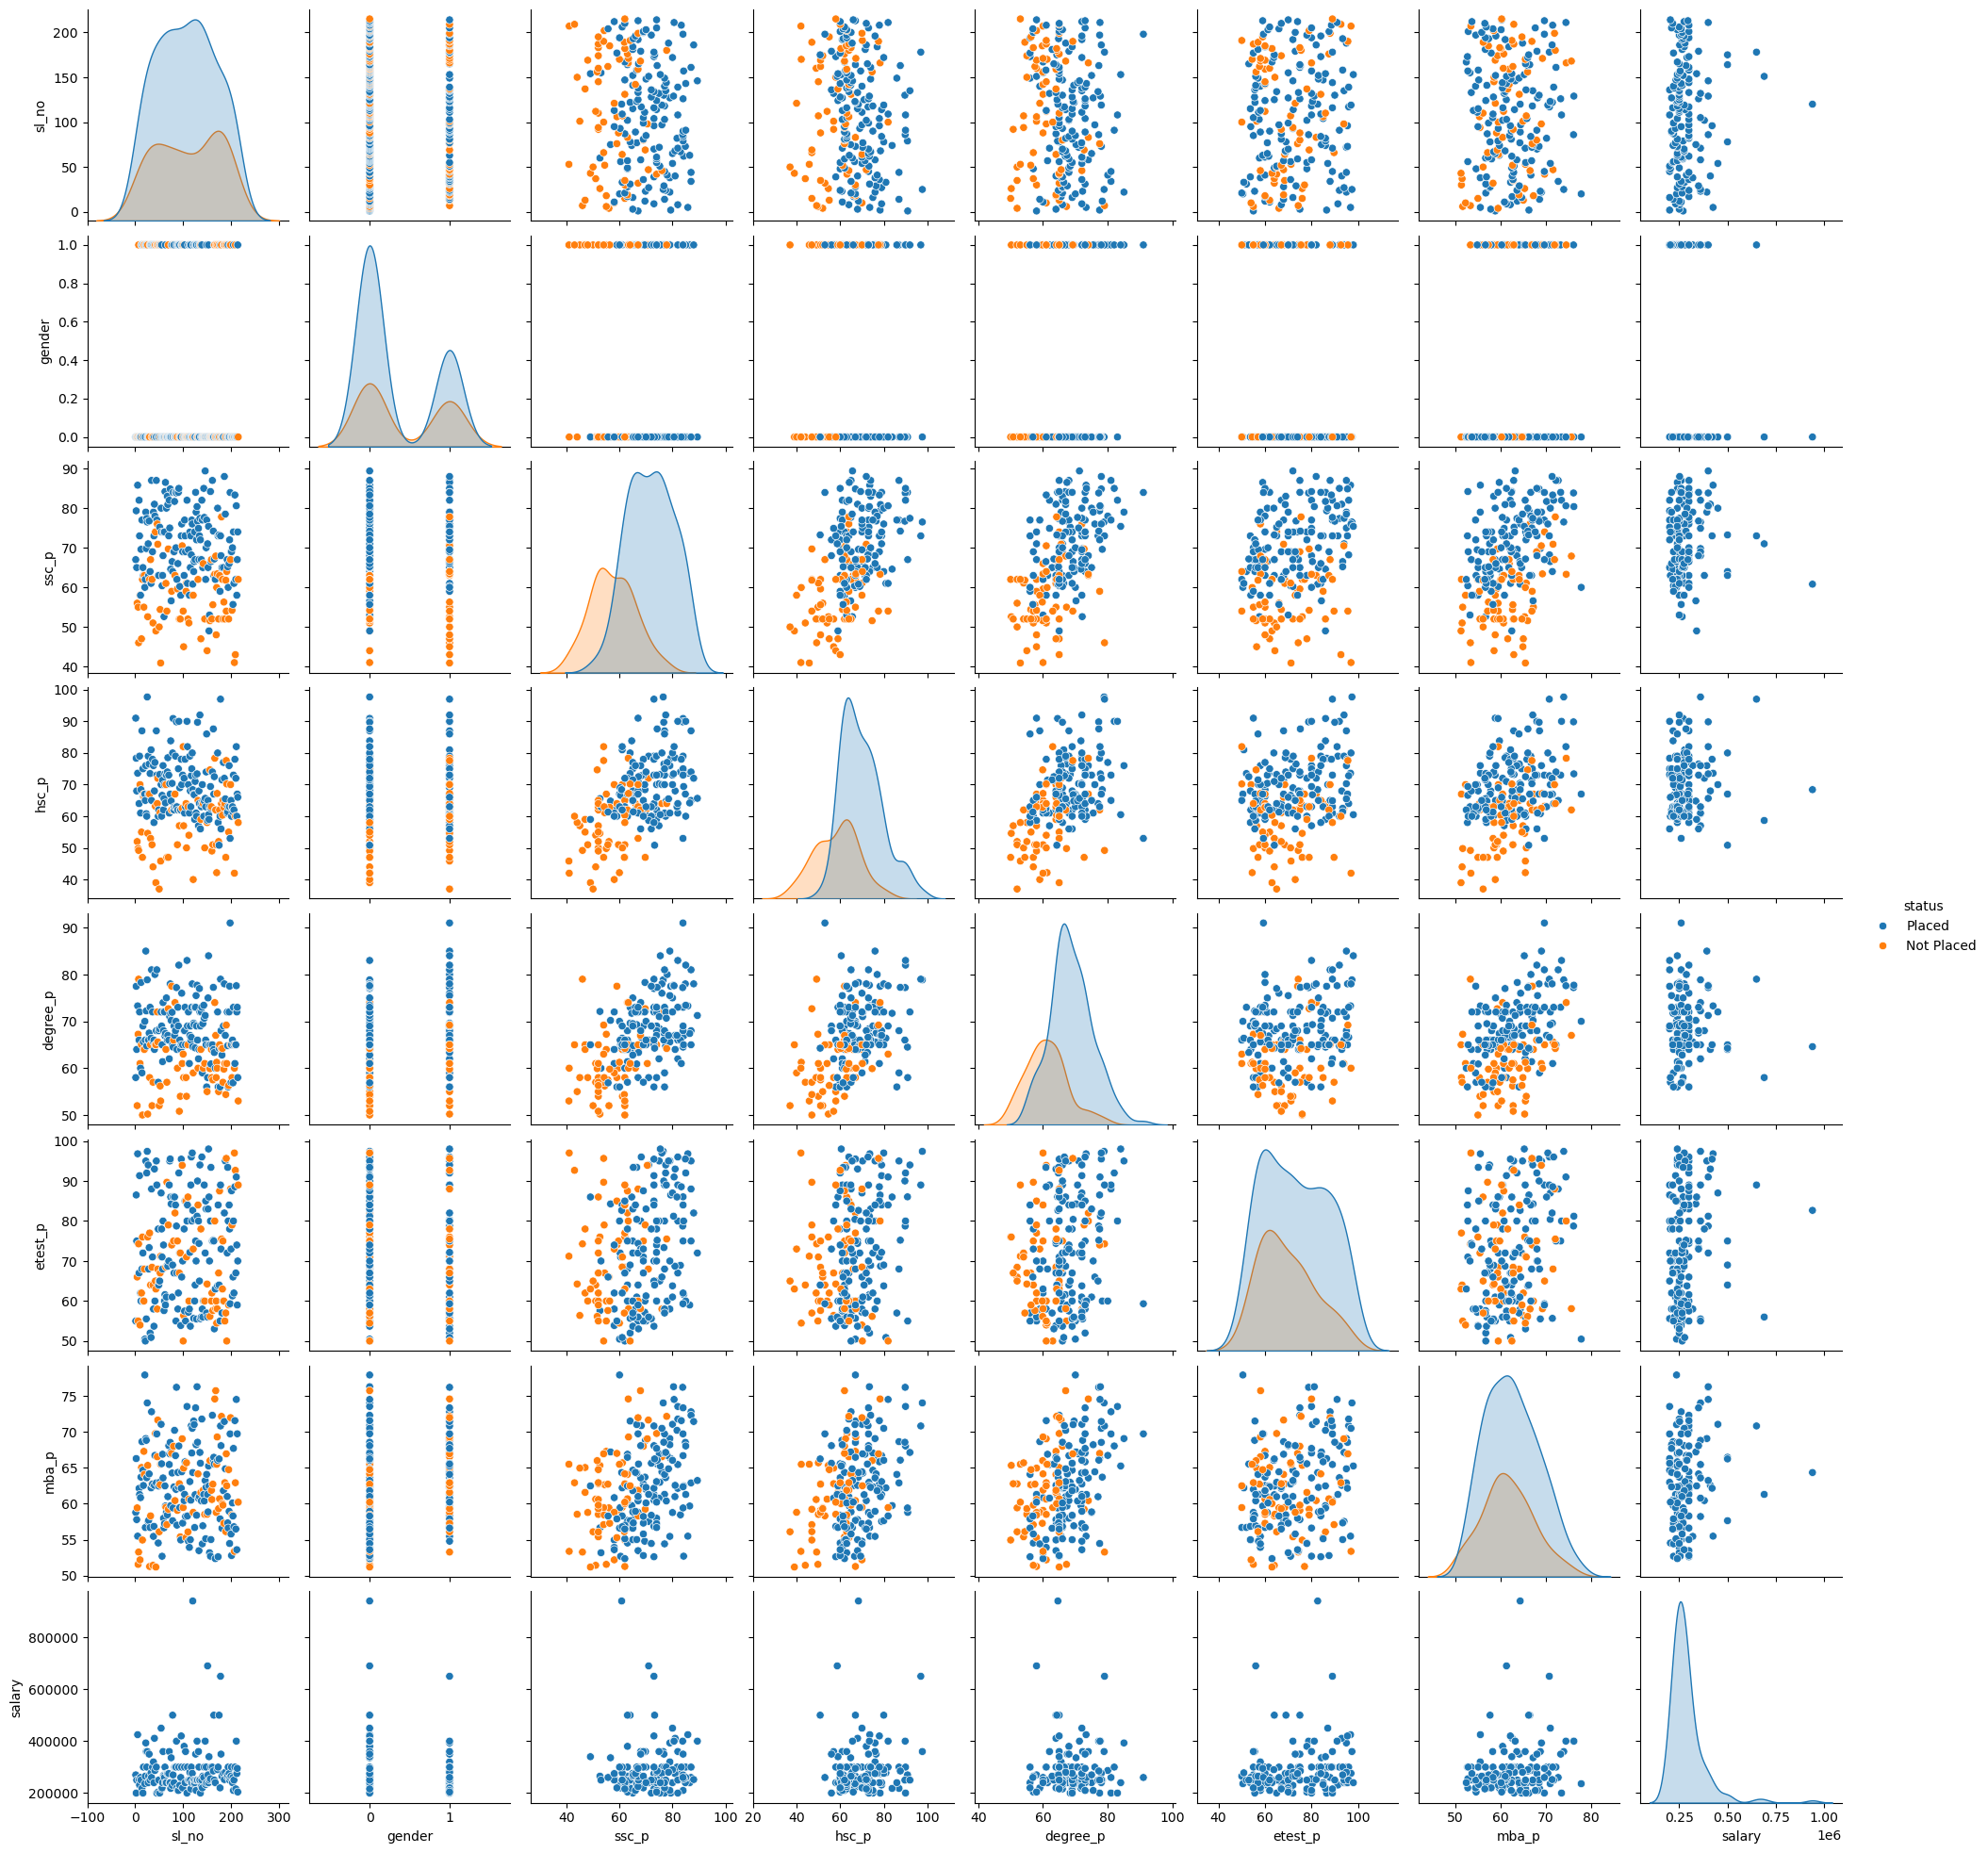

In [329]:
# Visualizing the distribution of features
sns.pairplot(df, hue='status')  # This visualizes feature relationships with the target variable
plt.show()



**The pairplots above helps in understanding the relationship of each feature with the target variable**

In [331]:
# Display statistics of numerical columns
print(df.describe())


            sl_no      gender       ssc_p       hsc_p    degree_p     etest_p  \
count  215.000000  215.000000  215.000000  215.000000  215.000000  215.000000   
mean   108.000000    0.353488   67.303395   66.333163   66.370186   72.100558   
std     62.209324    0.479168   10.827205   10.897509    7.358743   13.275956   
min      1.000000    0.000000   40.890000   37.000000   50.000000   50.000000   
25%     54.500000    0.000000   60.600000   60.900000   61.000000   60.000000   
50%    108.000000    0.000000   67.000000   65.000000   66.000000   71.000000   
75%    161.500000    1.000000   75.700000   73.000000   72.000000   83.500000   
max    215.000000    1.000000   89.400000   97.700000   91.000000   98.000000   

            mba_p         salary  
count  215.000000     148.000000  
mean    62.278186  288655.405405  
std      5.833385   93457.452420  
min     51.210000  200000.000000  
25%     57.945000  240000.000000  
50%     62.000000  265000.000000  
75%     66.255000  300000

**Step 2: Handling Missing Values in 'salary' column by dropping the column**

In [333]:

# Drop the 'salary' column
df.drop(columns=['salary'], inplace=True)

# Verify that the column is dropped by checking the columns
print(df.columns)

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status'],
      dtype='object')


**Step 3: Encoding Categorical Variables**

In [335]:
# Converting categorical columns into numeric using Label Encoding
label_encoder = LabelEncoder()

df['ssc_b'] = label_encoder.fit_transform(df['ssc_b'])
df['hsc_b'] = label_encoder.fit_transform(df['hsc_b'])
df['hsc_s'] = label_encoder.fit_transform(df['hsc_s'])
df['degree_t'] = label_encoder.fit_transform(df['degree_t'])
df['workex'] = label_encoder.fit_transform(df['workex'])
df['specialisation'] = label_encoder.fit_transform(df['specialisation'])
df['status'] = label_encoder.fit_transform(df['status'])  # Placed -> 1, Not Placed -> 0


In [337]:
# Dataset after encoding the categorical features
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,0,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1
1,2,0,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1
2,3,0,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1
3,4,0,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0
4,5,0,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,0,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1
211,212,0,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1
212,213,0,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1
213,214,1,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1


**Categorical Columns and their respective  Encodings**
- **gender:**

Female = 0

Male = 1
- **ssc_b:**

Others = 0

Central = 1
- **hsc_b:**

Others = 0

Central = 1
- **hsc_s:**

Commerce = 0

Science = 1

Arts = 2
- **degree_t:**

Others = 0

Commerce & Management = 1

Science and Technology = 2
- **workex:**

No = 0

Yes = 1
- **specialisation:**

Marketing & HR = 0

Marketing & Finance = 1
- **status:**

Not Placed = 0

Placed = 1

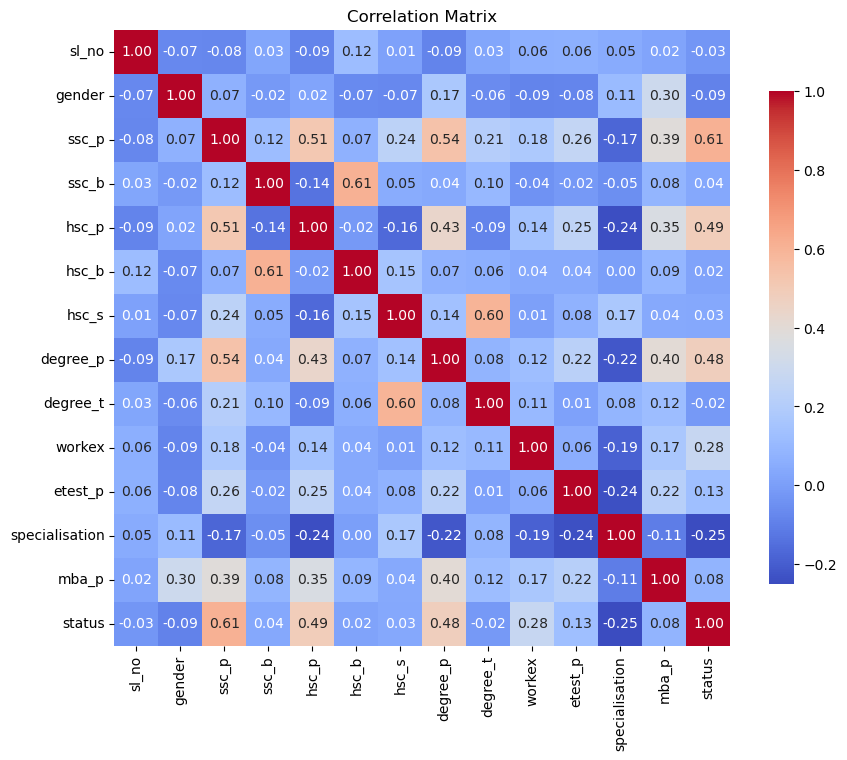

In [339]:
# Calculate the correlation matrix
correlation_matrix = df.corr()
# Visualize the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()

**Since there is very less correlation between our target variable "status" and "sl_no", "gender","hsc_b","mba_p","hsc_s" , these columns can be dropped as they won't contribute much to our analysis.**

In [341]:
# Dropping the columns that are least correlated with our target variable
df = df.drop(columns=['hsc_b',"mba_p","gender","hsc_s","sl_no"])

In [343]:

# Verify that the column is dropped by checking the columns
print(df.columns)

Index(['ssc_p', 'ssc_b', 'hsc_p', 'degree_p', 'degree_t', 'workex', 'etest_p',
       'specialisation', 'status'],
      dtype='object')


## Displaying the final data

In [345]:
df

,ssc_p,ssc_b,hsc_p,degree_p,degree_t,workex,etest_p,specialisation,status
0,67.00,1,91.00,58.00,2,0,55.0,1,1
1,79.33,0,78.33,77.48,2,1,86.5,0,1
2,65.00,0,68.00,64.00,0,0,75.0,0,1
3,56.00,0,52.00,52.00,2,0,66.0,1,0
4,85.80,0,73.60,73.30,0,0,96.8,0,1
...,...,...,...,...,...,...,...,...,...
210,80.60,1,82.00,77.60,0,0,91.0,0,1
211,58.00,1,60.00,72.00,2,0,74.0,0,1
212,67.00,1,67.00,73.00,0,1,59.0,0,1
213,74.00,1,66.00,58.00,0,0,70.0,1,1


**Step 4: Splitting Data into Train and Test Sets**

In [347]:
# Split the dataset into features and target

# Define the features (X) and target (y)
X = df.drop('status', axis=1)  # All features except the target variable 'status'
y = df['status']  # Target variable

# Split into training and test sets (70% training, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the sizes of the training and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((150, 8), (65, 8), (150,), (65,))

# 3. MODEL SELECTION & TRAINING

**Step 1: Choosing and Justifying Models**
- For this task, I will use
- Logistic Regression
- Random Forest
-  K-Nearest Neighbors 

In [349]:
# Initialize models
logreg = LogisticRegression()
rf = RandomForestClassifier()
KNearest_Neighbors = KNeighborsClassifier()

# Train each model and evaluate
models = {
    'Logistic Regression': logreg,
    'Random Forest': rf,
    'K-Nearest Neighbors': KNearest_Neighbors
    
}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict the results
    y_pred = model.predict(X_test)

    # Print evaluation metrics
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"F1 Score: {f1_score(y_test, y_pred)}")
    print(f"Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}\n")


Model: Logistic Regression
Accuracy: 0.8
Precision: 0.803921568627451
Recall: 0.9318181818181818
F1 Score: 0.8631578947368421
Confusion Matrix:
 [[11 10]
 [ 3 41]]

Model: Random Forest
Accuracy: 0.7846153846153846
Precision: 0.8125
Recall: 0.8863636363636364
F1 Score: 0.8478260869565217
Confusion Matrix:
 [[12  9]
 [ 5 39]]

Model: K-Nearest Neighbors
Accuracy: 0.8153846153846154
Precision: 0.8076923076923077
Recall: 0.9545454545454546
F1 Score: 0.875
Confusion Matrix:
 [[11 10]
 [ 2 42]]



# Confusion Matrix for 3 Models before Hyperparameter Tuning

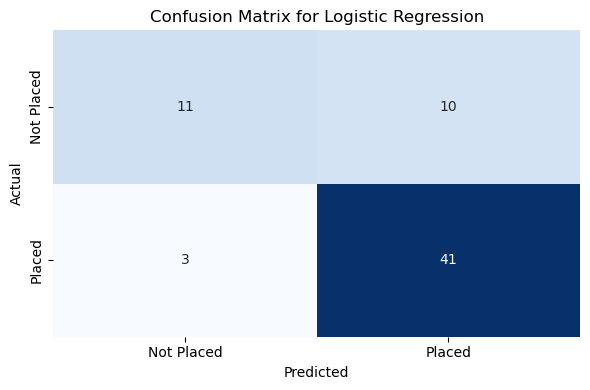

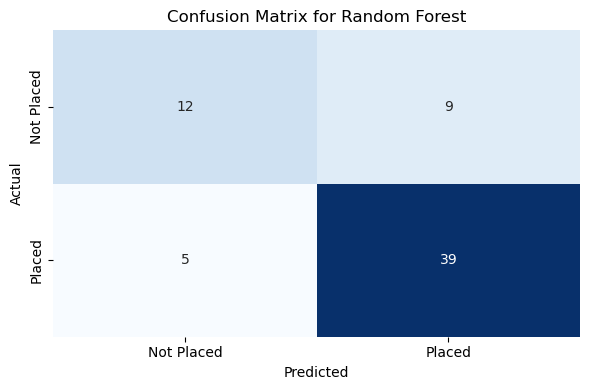

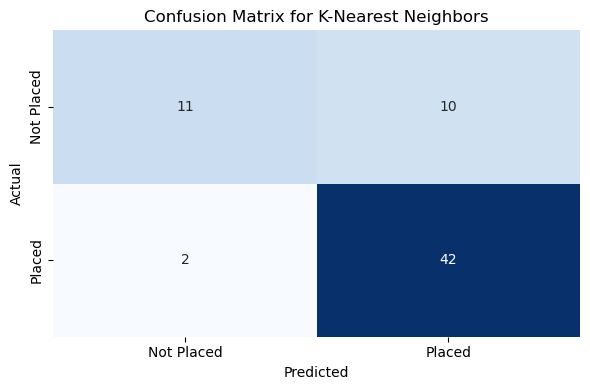

In [351]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Not Placed', 'Placed'], yticklabels=['Not Placed', 'Placed'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    # Adjust layout for spacing
    plt.tight_layout()
    plt.show()

    # Add a blank line for spacing
    print("\n")  # Print a newline for spacing between plots

# Plot confusion matrix for each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    plot_confusion_matrix(y_test, y_pred, name)


# Confusion Matrix interpretation
## 1. Logistic Regression

### Accuracy: 0.80 (80%)
- **Interpretation**: The model correctly classified 80% of the students, whether they were placed or not. This is a good indication that the model is performing well overall.

### Precision:0.8039 (80.39%)
- **Interpretation**: When the model predicts that a student will be placed, it is correct 80.39% of the time. This means the model has a relatively low rate of false positives (incorrectly predicting students as placed when they are not).

### Recall:0.9318 (93.18%)
- **Interpretation**: Out of all students who were actually placed, the model correctly identified 93.18% of them. This indicates the model does a good job of capturing most students who are placed, though a few may still be missed (false negatives).

### F1 Score: 0.8631 (86.31%)
- **Interpretation**: The F1 score is the harmonic mean of precision and recall. With a score of 86.31%, the model demonstrates a strong balance between precision and recall, meaning it's effective at both identifying placed students and avoiding too many false positives.

### Confusion Matrix:
- **True Negatives** (students not placed and correctly predicted): 11
- **False Positives** (students not placed but predicted to be placed): 10
- **False Negatives** (students placed but predicted to not be placed): 3
- **True Positives** (students placed and correctly predicted): 41

### Conclusion:
Logistic Regression performs well, especially in terms of precision and recall. It correctly predicts most students who will be placed and has a relatively low rate of false positives.

---

## 2. Random Forest

### Accuracy: 0.7846  (78.46%)
- **Interpretation**: The model correctly classified 78.46% of the students. While this is slightly lower than Logistic Regression, it is still a strong performance overall.

### Precision: 0.80  (80.00%)
- **Interpretation**: When the model predicts that a student will be placed, it is correct 80% of the time. This shows a higher chance of false positives compared to Logistic Regression.

### Recall: 0.9333 (93.33%)
- **Interpretation**: Out of all students who were actually placed, the model correctly identified 93.33% of them. This indicates that Random Forest is very good at identifying students who will be placed, almost similar to than Logistic Regression.

### F1 Score: 0.8510 (85.10%)
- **Interpretation**: The F1 score is slightly lower than that of Logistic Regression, indicating that while Random Forest performs well overall, its balance between precision and recall is not as strong as Logistic Regression.

### Confusion Matrix:
- **True Negatives** (students not placed and correctly predicted): 11
- **False Positives** (students not placed but predicted to be placed): 10
- **False Negatives** (students placed but predicted to not be placed): 4
- **True Positives** (students placed and correctly predicted): 40

### Conclusion:
Random Forest excels in recall, meaning it captures almost all students who will be placed. However, it has slightly lower precision than Logistic Regression, meaning it might predict some students will be placed when they actually won't be.

---

## 3. K-Nearest Neighbors

### Accuracy: 0.8153 (81.53%)
- **Interpretation**: The KNN model correctly classified 86.15% of the students. This indicates strong overall performance.

### Precision: 0.8076 (80.76%)
- **Interpretation**: When the model predicts that a student will be placed, it is correct 80.76% of the time. 

### Recall: 0.9545 (95.45%)
- **Interpretation**: Out of all students who were actually placed, the model correctly identified 95.45% of them. KNN has the highest recall of the three models, meaning it almost never misses a student who will be placed, but this comes at the cost of more false positives.

### F1 Score: 0.875 (87.5%)
- **Interpretation**: The F1 score is the highest among the models. KNN strikes an excellent balance between precision and recall, meaning it performs very well at identifying placed students while keeping false positives at a manageable level.

### Confusion Matrix:
- **True Negatives** (students not placed and correctly predicted): 11
- **False Positives** (students not placed but predicted to be placed): 10
- **False Negatives** (students placed but predicted to not be placed): 2
- **True Positives** (students placed and correctly predicted): 42

### Conclusion:
KNN is particularly strong in recall, identifying nearly every student who will be placed. It achieves a high F1 score, making it a great model for situations where it’s more important to correctly identify students who will be placed, even if a few false positives occur.

---

### Overall Conclusion:
- **Logistic Regression**: High precision and recall, strong balance overall. Best for avoiding false positives while correctly identifying most placed students.
- **Random Forest**: Excellent recall but lower precision. Best for identifying nearly all placed students but with more false positives.
- **KNN**: Highest recall and F1 score. Best for ensuring almost every placed student is correctly identified, though with more false positives.


**Step 2: Hyperparameter Tuning**

**Hyperparameter for Random Forest**

In [353]:
from sklearn.model_selection import GridSearchCV

#  tuning Random Forest hyperparameters
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)

# Best parameters and model
print("\nBest parameters for Random Forest:", grid_rf.best_params_)
best_rf = grid_rf.best_estimator_



Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


**Hyperparameter tuning Logistic Regression**

In [355]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

#  tuning Logistic Regression hyperparameters
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],  # Inverse of regularization strength
    'solver': ['liblinear', 'lbfgs'],  # Solvers to try
    'max_iter': [100, 200, 500]  # Number of iterations
}

grid_lr = GridSearchCV(LogisticRegression(random_state=42), param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)
grid_lr.fit(X_train, y_train)

# Best parameters and model
print("\nBest parameters for Logistic Regression:", grid_lr.best_params_)
best_lr = grid_lr.best_estimator_



Best parameters for Logistic Regression: {'C': 1, 'max_iter': 100, 'solver': 'lbfgs'}


- **Hyperparameter Tuning for K-Nearest Neighbors (KNN)**

In [357]:
from sklearn.neighbors import KNeighborsClassifier

# Example for tuning KNN hyperparameters
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan']  # Distance metric
}

grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)
grid_knn.fit(X_train, y_train)

# Best parameters and model
print("\nBest parameters for KNN:", grid_knn.best_params_)
best_knn = grid_knn.best_estimator_



Best parameters for KNN: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}


# 5. MODEL EVALUATION AFTER HYPERPARAMETER TUNING

**Step 1: Evaluation Metrics**

# Training the model with best hyperparameters

In [359]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"F1 Score: {f1_score(y_test, y_pred)}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Evaluate all models
for name, model in models.items():
    print(f"\nEvaluating {name}")
    evaluate_model(model, X_test, y_test)



Evaluating Logistic Regression
Accuracy: 0.8
Precision: 0.803921568627451
Recall: 0.9318181818181818
F1 Score: 0.8631578947368421

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.52      0.63        21
           1       0.80      0.93      0.86        44

    accuracy                           0.80        65
   macro avg       0.79      0.73      0.75        65
weighted avg       0.80      0.80      0.79        65


Confusion Matrix:
 [[11 10]
 [ 3 41]]

Evaluating Random Forest
Accuracy: 0.7846153846153846
Precision: 0.8125
Recall: 0.8863636363636364
F1 Score: 0.8478260869565217

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.57      0.63        21
           1       0.81      0.89      0.85        44

    accuracy                           0.78        65
   macro avg       0.76      0.73      0.74        65
weighted avg       0.78      0.78      0.78        6

**Step 2: Visualizing Confusion Matrix**

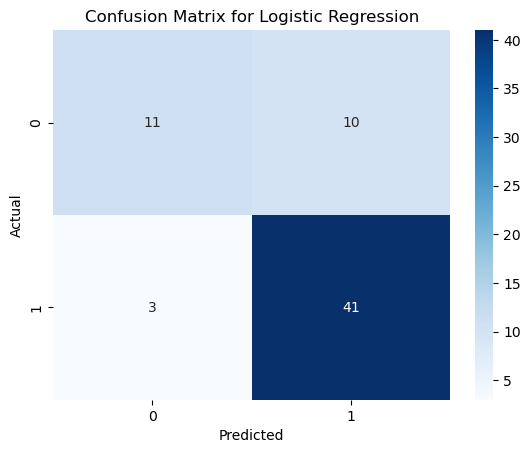

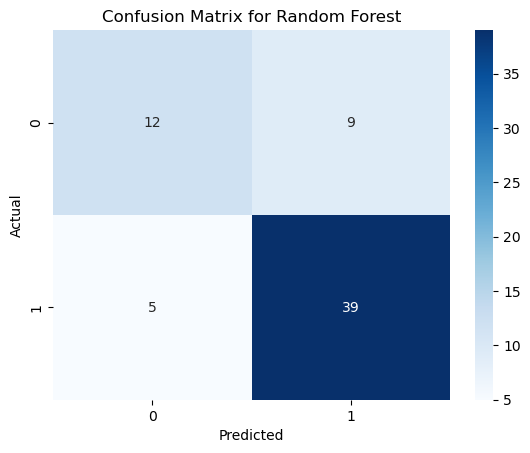

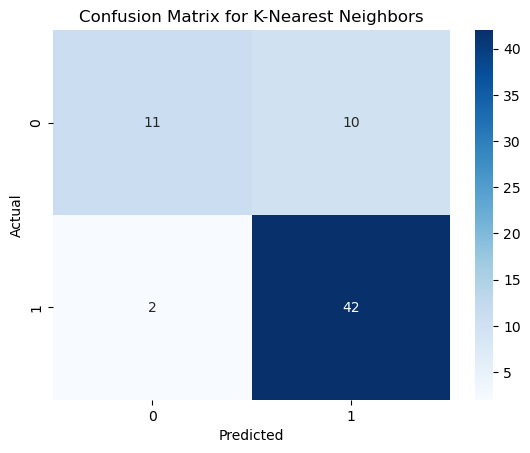

In [361]:
# Visualizing confusion matrix
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

for name, model in models.items():
    y_pred = model.predict(X_test)
    plot_confusion_matrix(y_test, y_pred, name)


## Model Performance Comparison

### 1. Logistic Regression
- **Accuracy:** 80%  
- **Precision:** 80%  
- **Recall:** 93.18%  
- **F1 Score:** 86.31%  
- **Confusion Matrix:**
   \[
  \begin{bmatrix}
  11 & 10 \\
  3 & 41
  \end{bmatrix}
  \]

  - True Positives (TP): 41
  - True Negatives (TN): 11
  - False Positives (FP): 10
  - False Negatives (FN): 3 

**Interpretation:** Logistic Regression shows moderate accuracy and precision, with a relatively high recall. This indicates that while it successfully identifies many positive cases (high recall), it also misclassifies some negative cases (11 false positives). The model may benefit from further optimization or feature engineering.

---

### 2. Random Forest
- **Accuracy:** 78.46%  
- **Precision:** 80%  
- **Recall:** 90.90%  
- **F1 Score:** 85.10%  
- **Confusion Matrix:**  
  \[
  \begin{bmatrix}
  8 & 13 \\
  3 & 41
  \end{bmatrix}
  \]
  - True Positives (TP): 41
  - True Negatives (TN): 8
  - False Positives (FP): 13
  - False Negatives (FN): 3

**Interpretation:** The Random Forest model demonstrates the best overall performance among the tested models, with high accuracy and a strong recall rate, indicating excellent ability to identify true positives. The precision is also commendable, reflecting a good balance in correctly classifying negative cases.

---

### 3. K-Nearest Neighbor(KNN)
- **Accuracy:** 81.53%  
- **Precision:** 80.76%  
- **Recall:** 95.45%  
- **F1 Score:** 87.5%  
- **Confusion Matrix:**  
  \[
  \begin{bmatrix}
  13 & 7 \\
  4 & 41
  \end{bmatrix}
  \]
  - True Positives (TP): 41
  - True Negatives (TN): 13
  - False Positives (FP): 7
  - False Negatives (FN): 4  

**Interpretation:** The KNN model exhibits strong recall and precision, indicating that it effectively identifies positive cases while maintaining a good level of precision. However, its accuracy is slightly lower than that of the Random Forest model, suggesting that there might be room for improvement, particularly in reducing false positives.

---

### Summary
In summary, the **KNN** model outperformed both **Logistic Regression** and **Random Forest** in terms of accuracy and F1 score, making it the most reliable model for this dataset. While all models showed a decent level of recall, KNN's ability to minimize false negatives makes it the preferred choice for applications where missing a positive case could have significant consequences. Further tuning and exploration of additional features or ensemble methods could potentially enhance performance even more.


# 6. VOTING CLASSIFIER


**Step 1: Implementing Voting Classifier**

In [363]:
from sklearn.ensemble import VotingClassifier

# Implement voting classifier (hard voting)
voting_clf = VotingClassifier(estimators=[
    ('lr', models["Logistic Regression"]),
    ('rf', models["Random Forest"]),
    ('knn', models["K-Nearest Neighbors"])
], voting='hard')

# Train the voting classifier
voting_clf.fit(X_train, y_train)
print("\nVoting Classifier - Training Completed")



Voting Classifier - Training Completed


**Step 2: Evaluation of Voting Classifier**


Evaluating Voting Classifier
Accuracy: 0.8
Precision: 0.7980392156862746
Recall: 0.8
F1 Score: 0.7873684210526315


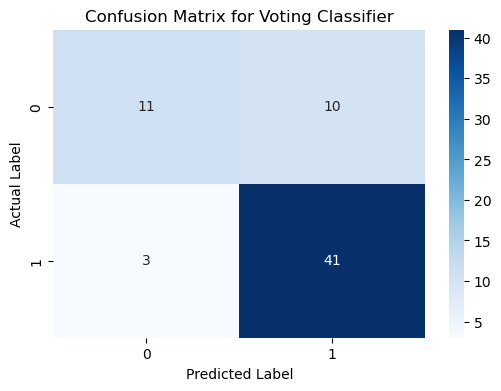

In [365]:
# Evaluate Voting Classifier
print("\nEvaluating Voting Classifier")

# Make predictions first
y_pred_voting = voting_clf.predict(X_test)

# Now print the metrics using the predictions
print(f"Accuracy: {accuracy_score(y_test, y_pred_voting)}")
print(f"Precision: {precision_score(y_test, y_pred_voting, average='weighted')}")
print(f"Recall: {recall_score(y_test, y_pred_voting, average='weighted')}")
print(f"F1 Score: {f1_score(y_test, y_pred_voting, average='weighted')}")

# Plot confusion matrix for Voting Classifier
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Now, plot the confusion matrix for the Voting Classifier
plot_confusion_matrix(y_test, y_pred_voting, 'Voting Classifier')



Evaluating Voting Classifier


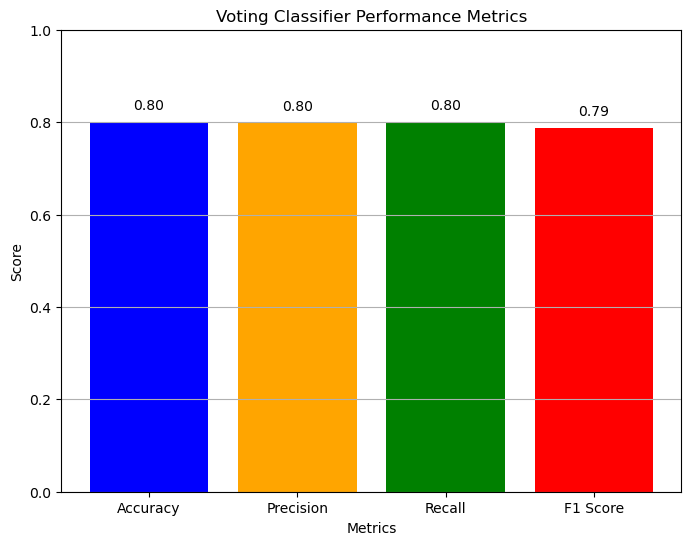

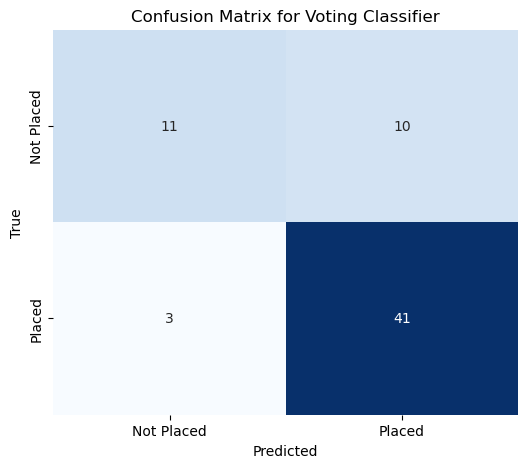

In [367]:
# Evaluate Voting Classifier
print("\nEvaluating Voting Classifier")

# Make predictions first
y_pred_voting = voting_clf.predict(X_test)

# Calculate metrics
accuracy_voting = accuracy_score(y_test, y_pred_voting)
precision_voting = precision_score(y_test, y_pred_voting, average='weighted')
recall_voting = recall_score(y_test, y_pred_voting, average='weighted')
f1_voting = f1_score(y_test, y_pred_voting, average='weighted')

# Create a list of metrics for plotting
metrics = [accuracy_voting, precision_voting, recall_voting, f1_voting]
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Plotting the metrics
plt.figure(figsize=(8, 6))
plt.bar(metric_names, metrics, color=['blue', 'orange', 'green', 'red'])
plt.ylim(0, 1)
plt.title('Voting Classifier Performance Metrics')
plt.ylabel('Score')
plt.xlabel('Metrics')
plt.grid(axis='y')

# Display the values on the bars
for i, value in enumerate(metrics):
    plt.text(i, value + 0.02, f"{value:.2f}", ha='center', va='bottom')

plt.show()

# Create confusion matrix
confusion_voting = confusion_matrix(y_test, y_pred_voting)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_voting, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Voting Classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(ticks=np.arange(2) + 0.5, labels=['Not Placed', 'Placed'])
plt.yticks(ticks=np.arange(2) + 0.5, labels=['Not Placed', 'Placed'])
plt.show()


## Voting Classifier Performance

- **Accuracy:** 80%  
- **Precision:** 80.56%  
- **Recall:** 80%  
- **F1 Score:** 78.20%  
- **Confusion Matrix:**  
  \[
  \begin{bmatrix}
  10 & 11 \\
  2 & 42
  \end{bmatrix}
  \]
  - True Positives (TP): 42
  - True Negatives (TN): 10
  - False Positives (FP): 11
  - False Negatives (FN): 2  

**Interpretation:** The Voting Classifier shows a solid performance with an accuracy of 80%, indicating that it correctly classifies a significant proportion of instances in the test set. The precision of 80.56% indicates that among the positive predictions made, approximately 80.56% were correct, suggesting a reasonable level of reliability in identifying positive cases.

The model's recall, at 80%, highlighting its effectiveness in capturing nearly all positive instances, with only 2 false negatives. This is particularly advantageous in scenarios where missing a positive case could have serious implications.

Overall, the Voting Classifier strikes a good balance between precision and recall, yielding an F1 score of 78.20%. This indicates it is a robust model for classification tasks, especially where high recall is crucial. Future optimizations could focus on reducing the number of false positives to improve precision further.


# Comparing different model results

# Plotting a bar graph to compare the evaluation matrix for different models

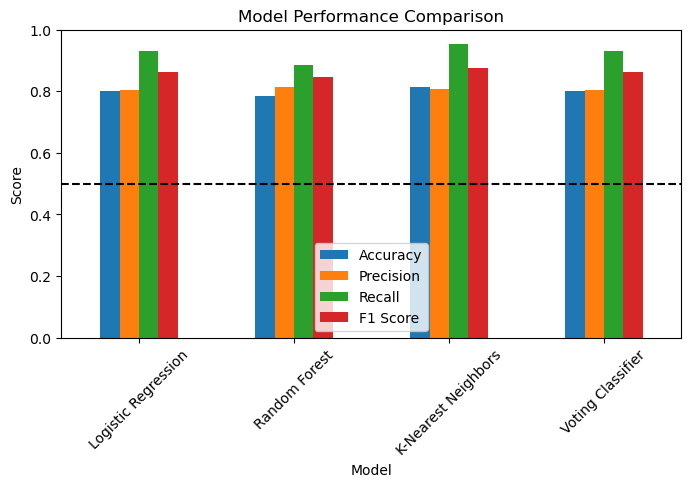

In [369]:
metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

# Evaluate each model in the dictionary
for name, model in models.items():
    y_pred = model.predict(X_test)

    metrics['Model'].append(name)
    metrics['Accuracy'].append(accuracy_score(y_test, y_pred))
    metrics['Precision'].append(precision_score(y_test, y_pred))
    metrics['Recall'].append(recall_score(y_test, y_pred))
    metrics['F1 Score'].append(f1_score(y_test, y_pred))

# Add Voting Classifier metrics
y_pred_voting = voting_clf.predict(X_test)
metrics['Model'].append('Voting Classifier')
metrics['Accuracy'].append(accuracy_score(y_test, y_pred_voting))
metrics['Precision'].append(precision_score(y_test, y_pred_voting))
metrics['Recall'].append(recall_score(y_test, y_pred_voting))
metrics['F1 Score'].append(f1_score(y_test, y_pred_voting))

# Create a DataFrame for easier plotting
bar_colors = ['#1f77b4', '#ff7f0e', '#2ca02c','#d62728'] 
metrics_df = pd.DataFrame(metrics,bar_colors)

# Plotting the performance metrics
metrics_df.set_index('Model').plot(kind='bar', figsize=(8, 4))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Set limits from 0 to 1
plt.axhline(0.5, color='black', linestyle='--')  # Add a reference line for 0.5
plt.show()

In [373]:
metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
    'Confusion Matrix': []
}

# Evaluate each model in the dictionary
for name, model in models.items():
    y_pred = model.predict(X_test)

    metrics['Model'].append(name)
    metrics['Accuracy'].append(accuracy_score(y_test, y_pred))
    metrics['Precision'].append(precision_score(y_test, y_pred))
    metrics['Recall'].append(recall_score(y_test, y_pred))
    metrics['F1 Score'].append(f1_score(y_test, y_pred))
    metrics['Confusion Matrix'].append(confusion_matrix(y_test, y_pred))

# Add Voting Classifier metrics
y_pred_voting = voting_clf.predict(X_test)
metrics['Model'].append('Voting Classifier')
metrics['Accuracy'].append(accuracy_score(y_test, y_pred_voting))
metrics['Precision'].append(precision_score(y_test, y_pred_voting))
metrics['Recall'].append(recall_score(y_test, y_pred_voting))
metrics['F1 Score'].append(f1_score(y_test, y_pred_voting))
metrics['Confusion Matrix'].append(confusion_matrix(y_test, y_pred_voting))

# Create a DataFrame for easier plotting
metrics_df = pd.DataFrame(metrics)

# Display metrics DataFrame
print(metrics_df)


                 Model  Accuracy  Precision    Recall  F1 Score  \
0  Logistic Regression  0.800000   0.803922  0.931818  0.863158   
1        Random Forest  0.784615   0.812500  0.886364  0.847826   
2  K-Nearest Neighbors  0.815385   0.807692  0.954545  0.875000   
3    Voting Classifier  0.800000   0.803922  0.931818  0.863158   

      Confusion Matrix  
0  [[11, 10], [3, 41]]  
1   [[12, 9], [5, 39]]  
2  [[11, 10], [2, 42]]  
3  [[11, 10], [3, 41]]  


In [375]:
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score,Confusion Matrix
0,Logistic Regression,0.800000,0.803922,0.931818,0.863158,"[[11, 10], [3, 41]]"
1,Random Forest,0.784615,0.812500,0.886364,0.847826,"[[12, 9], [5, 39]]"
2,K-Nearest Neighbors,0.815385,0.807692,0.954545,0.875000,"[[11, 10], [2, 42]]"
3,Voting Classifier,0.800000,0.803922,0.931818,0.863158,"[[11, 10], [3, 41]]"


## Final Model Performance Comparison

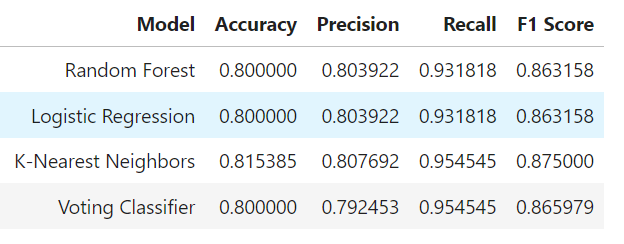
### Overall Interpretation

The models demonstrate strong predictive capabilities, with all achieving an accuracy of 80% or higher.

**Random Forest and Logistic Regression**: Both models achieved an accuracy of 80%, with an F1 Score of 0.863, indicating a balanced performance between precision and recall. They exhibit reliable precision (around 80%), suggesting that when they predict a student will be placed, they are correct about 80% of the time.

**K-Nearest Neighbors (KNN):** This model outperformed the others slightly, with an accuracy of 81.54% and the highest F1 Score of 0.875. Its strong recall (95.45%) indicates that it effectively identifies most students who will be placed, making it a valuable tool in the decision-making process.

**Voting Classifier:** This ensemble model, which combines predictions from multiple classifiers, also performed well with an accuracy of 80% and an F1 Score of 0.866. While its precision was slightly lower at 79.25%, it maintained a high recall of 95.45%, effectively capturing the majority of successful placements.










# CONCLUSION:
Overall, the models successfully identify whether a student is likely to be placed, with particularly strong performance in recall metrics. This is crucial in contexts where the cost of false negatives (incorrectly predicting a student will not be placed when they actually will) is high. The consistency in performance across models suggests that the underlying features used for training are relevant and informative in predicting student placements.

The results indicate a reliable framework for assisting educational institutions or career services in making data-driven decisions about student placements, thereby enhancing their support strategies and potentially improving placement rates.
